#Assignment 2
Problem : Imputing Continuous and Categorical Data using KNN_Imputer

Dataset: Custom-made Dataset (According to as the assignment asked)

ML Model: K-Nearest Neighbors Imputer

Performance of Model: 100% accuracy

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import nan_euclidean_distances
import matplotlib.pyplot as plt

# KNN for Regression (Continuous Data)

In [ ]:
#creating the dataset
data = {'X' : [11, 19, 15, 16, 18, 30, 22, 29, 21, 25],
        'Y' : [66, 69, 70, 61, 62, 88, 87, 89, 81, 80],
        'Z' : [1, 3, 4, 6, 7, 20, 19, 25, 12, 10]}

df = pd.DataFrame(data)

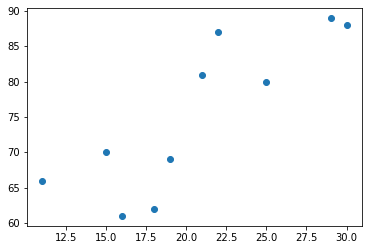

In [ ]:
plt.scatter(df.X, df.Y)
plt.show()

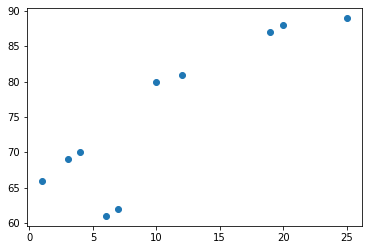

In [ ]:
plt.scatter(df.Z, df.Y)
plt.show()

As observed, the target data 'Y' is forming clusters wrt 'X' and 'Z' which can be utilised by KNN for its distance metric 

In [ ]:
#creating the dataset with missing values
data_missing = {'X' : [11, 19, 15, 16, 18, 30, 22, 29, 21, 25],
                'Y' : [66, 69, np.nan, 61, 62, np.nan, 87, 89, np.nan, 80],
                'Z' : [1, 3, 4, 6, 7, 20, 19, 25, 12, 10]}
df_missing = pd.DataFrame(data_missing)

In [ ]:
df_x = df_missing[df.columns[df.columns != 'Y']]
df_y = df_missing[df.columns[df.columns == 'Y']]

KNN Imputation needs us to scale/transform the data as KNN depends on feature simiarity and needs the data measure to be uniform

In [ ]:
#scaling the missing dataset
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
scaled = scale.fit_transform(df_missing)
df_scaled = pd.DataFrame(scaled, columns = ['X', 'Y', 'Z'])

In [ ]:
df_scaled

,X,Y,Z
0,0.000000,0.178571,0.000000
1,0.421053,0.285714,0.083333
2,0.210526,NaN,0.125000
3,0.263158,0.000000,0.208333
4,0.368421,0.035714,0.250000
5,1.000000,NaN,0.791667
6,0.578947,0.928571,0.750000
7,0.947368,1.000000,1.000000
8,0.526316,NaN,0.458333
9,0.736842,0.678571,0.375000


In [ ]:
#scaling the original dataset(with no missing values)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
original_df_scaled = pd.DataFrame(scaled_data, columns = ['X', 'Y', 'Z'])
original_df_scaled

,X,Y,Z
0,0.000000,0.178571,0.000000
1,0.421053,0.285714,0.083333
2,0.210526,0.321429,0.125000
3,0.263158,0.000000,0.208333
4,0.368421,0.035714,0.250000
5,1.000000,0.964286,0.791667
6,0.578947,0.928571,0.750000
7,0.947368,1.000000,1.000000
8,0.526316,0.714286,0.458333
9,0.736842,0.678571,0.375000


In [ ]:
#Finding the ideal value of k 
from sklearn.metrics import mean_absolute_error
from sklearn.impute import KNNImputer
def accuracy(original_df, scale_data):
  for k in range(1, 6):
    imputer = KNNImputer(n_neighbors = k)
    df_filled = pd.DataFrame(imputer.fit_transform(scale_data), columns = ['X', 'Y', 'Z'])
    metric_one = df_filled.Y
    metric_two = original_df.Y
    print("For k = {} , the error is {}".format(k, mean_absolute_error(metric_one, metric_two)))

accuracy(original_df_scaled, df_scaled)

For k = 1 , the error is 0.03928571428571433
For k = 2 , the error is 0.06607142857142864
For k = 3 , the error is 0.0476190476190477
For k = 4 , the error is 0.08035714285714293
For k = 5 , the error is 0.07928571428571436


The most ideal no of neighbours in our set is k = 1 

In [ ]:
#imputing the missing dataset and inversing it back to unscaled data
from sklearn.impute import KNNImputer
imputer_one = KNNImputer(n_neighbors = 1)
df_filled_scaled = imputer_one.fit_transform(df_scaled)
df_filled_inversed = pd.DataFrame(scale.inverse_transform(df_filled_scaled), columns =['X', 'Y', 'Z'])
df_filled_inversed

,X,Y,Z
0,11.0,66.0,1.0
1,19.0,69.0,3.0
2,15.0,61.0,4.0
3,16.0,61.0,6.0
4,18.0,62.0,7.0
5,30.0,89.0,20.0
6,22.0,87.0,19.0
7,29.0,89.0,25.0
8,21.0,80.0,12.0
9,25.0,80.0,10.0


In [ ]:
from sklearn.metrics import r2_score
y_pred = df_filled_inversed.Y #Imputed Data
y_test = df.Y #Initial Data we are checking with

print("r2_score = ", r2_score(y_test, y_pred))
print("MAE measure = ", mean_absolute_error(y_test, y_pred))

r2_score =  0.9228696217823622
MAE measure =  1.1000000000000008


This is the final metric between the given two datasets to find the accuracy of the imputation

# KNN Imputation for categorical data (Classification):

In [ ]:
#creating the dataset
cat_data = {'Age' : [18, 8, 9, 2, 20, 14, 5, 12, 10, 11],
            'Class' : [5, 3, 3, 1, 5, 4, 2, 4, 4, 4],
            'Gender' : ['M', 'F', 'F', 'F', 'M', 'M', 'F', 'M', 'F', 'M']}
cat_df = pd.DataFrame(cat_data)
cat_df

,Age,Class,Gender
0,18,5,M
1,8,3,F
2,9,3,F
3,2,1,F
4,20,5,M
5,14,4,M
6,5,2,F
7,12,4,M
8,10,4,F
9,11,4,M


In [ ]:
#creating a copy of the dataset but with missing values
cat_data_missing = {'Age' : [18, 8, 9, 2, 20, 14, 5, 12, 10, 11],
            'Class' : [5, 3, 3, 1, 5, 4, 2, 4, 4, 4],
            'Gender' : ['M', 'F', 'F', np.nan, 'M', 'M', np.nan, 'M', 'F', np.nan]}
cat_df_missing = pd.DataFrame(cat_data_missing)
cat_df_missing

,Age,Class,Gender
0,18,5,M
1,8,3,F
2,9,3,F
3,2,1,NaN
4,20,5,M
5,14,4,M
6,5,2,NaN
7,12,4,M
8,10,4,F
9,11,4,NaN


In [ ]:
#encoding the Gender columns using the Label Encoder
encode_data = cat_df_missing[cat_df_missing['Gender'].isnull() == False]
encode_data

,Age,Class,Gender
0,18,5,M
1,8,3,F
2,9,3,F
4,20,5,M
5,14,4,M
7,12,4,M
8,10,4,F


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encode_data.Gender = encoder.fit_transform(encode_data.Gender)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
encode_data

,Age,Class,Gender
0,18,5,1
1,8,3,0
2,9,3,0
4,20,5,1
5,14,4,1
7,12,4,1
8,10,4,0


In [ ]:
#Setting up the training data and test data for prediction model
x_train = encode_data[encode_data.columns[encode_data.columns != 'Gender']]
y_train = encode_data[encode_data.columns[encode_data.columns == 'Gender']]
missing_gender = cat_df_missing[cat_df_missing['Gender'].isnull() == True]

In [ ]:
#Taking KNN Algorithm to predict missing values using Hamming DistanceMetric 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric="hamming")
classifier = classifier.fit(x_train, y_train.values.ravel())

In [ ]:
x_test = missing_gender[missing_gender.columns[missing_gender.columns != 'Gender']]
x_test

,Age,Class
3,2,1
6,5,2
9,11,4


In [ ]:
#Generating prediction value
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 1])

In [ ]:
#Inverting the encoded data back to categorical data
y_pred = encoder.inverse_transform(y_pred)

In [ ]:
y_test = cat_df.loc[[3, 6, 9], 'Gender']
y_test

3    F
6    F
9    M
Name: Gender, dtype: object

In [ ]:
#Calculating accuracy of the model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

1.0
